CB Loss paper: https://papers.nips.cc/paper/2019/file/f82798ec8909d23e55679ee26bb26437-Paper.pdf 
w code: https://github.com/cunningham-lab/cb_and_cc/blob/master/cb/utils.py

Ways to implement losses: as class, or objective function.
See https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile 
under "loss".

Try to do obj f first?

Loss repo: https://github.com/tensorflow/tensorflow/blob/v2.5.0/tensorflow/python/keras/losses.py#L175-L189 

blog post about tensor shapes: 
https://blog.metaflow.fr/shapes-and-dynamic-dimensions-in-tensorflow-7b1fe79be363 

maybe we should not have an extra dim in input? i.e (batch_size, 28, 28, 1)?

TODO: create custom training step function in autoencoder class, where 'cb' can be input to specify the loss (cont. bern)

https://stackoverflow.com/questions/58022713/tensorflow-2-0-custom-loss-function-with-multiple-inputs 


In [1]:
import numpy as np
import tensorflow as tf

# a = tf.zeros((28, 28, 1))
# print(a.shape)
# print(tf.reshape(a, [-1]).shape)

b = (28, 28, 1)
print(tf.reduce_sum(b).numpy())

57


In [2]:
import importlib
import autoencoder
importlib.reload(autoencoder)
from autoencoder import Autoencoder

model = Autoencoder((28, 28, 1), latent_dim=32, model_type='cnn')
img = tf.zeros((10, 28, 28, 1))
print(model(img).shape)

# We have to send in an input with a batch dimension when using call?

ImportError: cannot import name 'Autoencoder' from partially initialized module 'autoencoder' (most likely due to a circular import) (c:\Users\Lukas\Desktop\VSCode Project\JL-ML\JL-ML\Autoencoder\completed\autoencoder.py)

In [ ]:
from tensorflow.keras import losses
import cb_loss as cb
importlib.reload(cb)

# Necessary for specifying optimizer, loss, etc.
# model.compile(optimizer='adam', loss = losses.BinaryCrossentropy())
loss_f = cb.cb_autoencoder_loss
model.compile(optimizer='adam', loss = loss_f)


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)

# Adding extra batch dimension?
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
print(x_test.shape)
rank = tf.rank(x_test).numpy()
axes_to_reduce = [dim for dim in range(1, tf.rank(x_test))]
x_test_reduced = tf.reduce_sum(x_test, axis=axes_to_reduce)

print(x_test_reduced.shape)

(10000, 28, 28, 1)
(10000,)


In [86]:
history = model.fit(x_train, x_train,
                epochs=5,
                batch_size=64,
                shuffle=False,
                validation_data=(x_test, x_test))

Epoch 1/5
938/938 [==============================] - 44s 45ms/step - loss: -1329.2646 - val_loss: -1528.2133
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: -1546.7241 - val_loss: -1553.9951
Epoch 3/5
938/938 [==============================] - 44s 47ms/step - loss: -1559.8589 - val_loss: -1561.4255
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: -1564.8799 - val_loss: -1564.3606
Epoch 5/5
938/938 [==============================] - 44s 47ms/step - loss: -1567.7605 - val_loss: -1566.9915


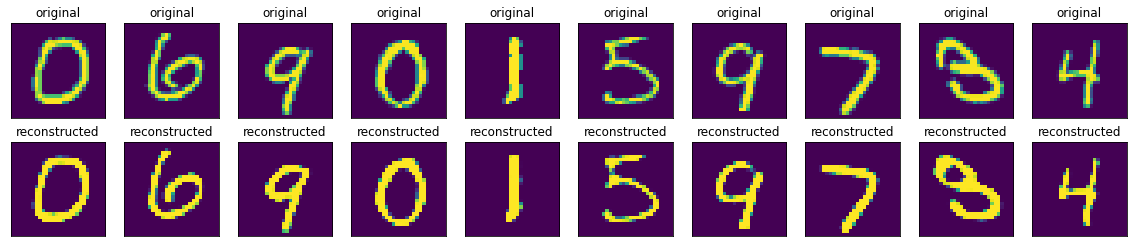

In [87]:
import matplotlib.pyplot as plt

encoded_imgs = model.encoder(x_test).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4)) # Specifies window width / height
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+10])
    plt.title("original")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+10])
    plt.title("reconstructed")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)